In [1]:
import math as m

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import special
from pylab import *
%matplotlib inline

from src import billiard_quarterClass as bc
from src import curveClass as cv
from src import plottingFunctions as pf
#from src import verginiSaraceno as vs
#from src import planeWaveDecomposition as pwd

In [2]:
# line
def line_r(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    x = (x1-x0) * t + x0 
    y = (y1-y0) * t + y0
    return x, y

def line_n(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    nx = (y1 - y0)/l
    ny = (x0 - x1)/l
    return nx, ny

def line_arc(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    return t * l

# circle arc
def circle_r(t, R = 1, x0 = 0, y0 = 0, angle = 2*np.pi, shift = 0):
    x = x0 + R * np.cos(t*angle + shift)
    y = y0 + R * np.sin(t*angle + shift)
    return x, y

def circle_n(t, angle = 2*np.pi, shift = 0, **kwargs):
    nx = np.cos(t*angle + shift)
    ny = np.sin(t*angle + shift)
    return nx, ny

def circle_arc(t, R = 1, angle = 2*np.pi, **kwargs):
    return  R * angle *t

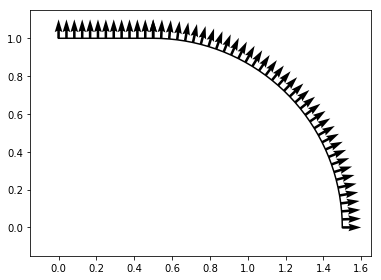

In [3]:
eps = 0.5
params_1 = {"x0" : eps, "y0" : 1, "x1" : 0, "y1": 1 }
line = cv.curve(line_r, line_n, line_arc, **params_1)
params_2 = {"angle" : np.pi/2, "x0" : eps}
circle = cv.curve(circle_r, circle_n, circle_arc, **params_2)

curves = [circle, line]
area = 0.5 * np.pi + eps
dens = [10 for i in curves]
stadiumBilliard = bc.billiard_quarter(curves, area, point_densities= dens)
stadiumBilliard.plot_boundary(M =5)

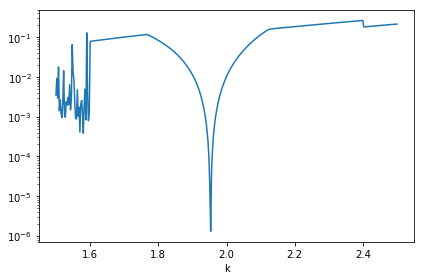

In [4]:
k1 = 1.50
k2 = 2.50
sym = 0
stadiumBilliard.plot_tension( k1, k2, sym, N = 200, grid = 400)

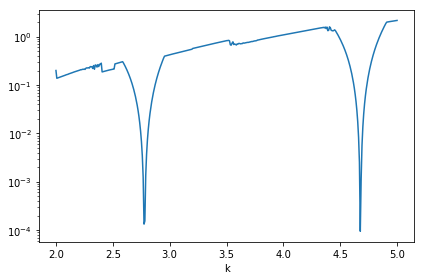

In [5]:
k1 = 2.0
k2 = 5.0
sym = 2
stadiumBilliard.plot_tension( k1, k2, sym, N = 200, grid = 400)

In [6]:
k0 = 1.9
dk = 0.1
N = 200
sym = 0
VSresult = stadiumBilliard.scaling_eigenvalues(N, k0, dk, sym)
print(VSresult)

[ 1.95238819]


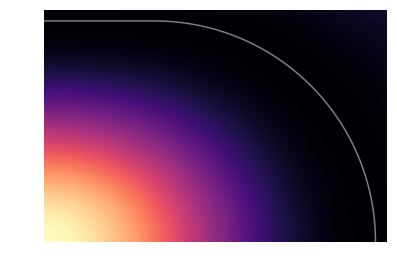

In [7]:
stadiumBilliard.plot_probability( VSresult[0], sym)

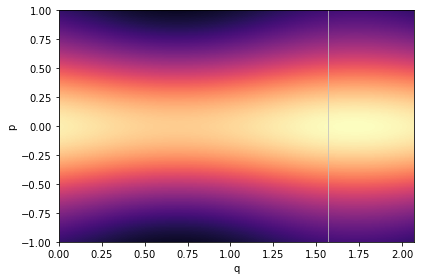

In [9]:
stadiumBilliard.plot_Husimi_function(VSresult[0],sym)

In [10]:
k0 = 40.4
dk = 0.1
N = 600
sym = 0
VSresult = stadiumBilliard.scaling_eigenvalues(N, k0, dk, sym)
print(VSresult)

[ 40.32884607]


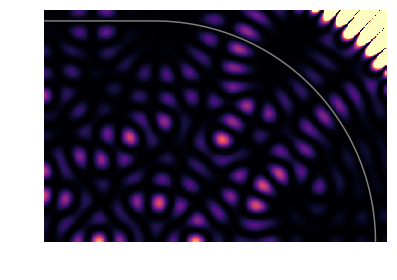

In [15]:
stadiumBilliard.plot_probability(VSresult[0],sym, scale = 0.0001)

     fun: 0.00012381377873533543
 message: 'Solution found.'
    nfev: 16
  status: 0
 success: True
       x: 40.329072438893668


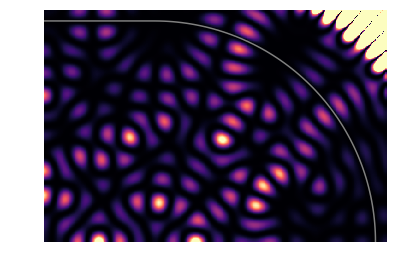

In [16]:
k0 = 40.4
dk = 0.1
N = 600
sym = 0
PWDresult = stadiumBilliard.PWD_eigenvalue(N, k0, dk,sym)
print(PWDresult)
stadiumBilliard.plot_probability(PWDresult.x, sym, scale = 0.0001)

1 loop, best of 3: 47 s per loop


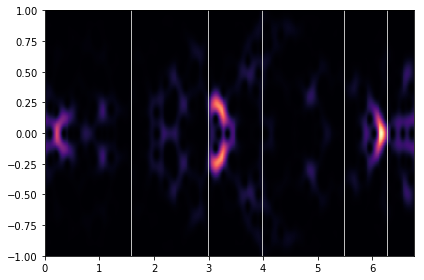

In [11]:
%%timeit
pf.plot_Husimi_function(VSresult[3],sym,delta = 2)

1 loop, best of 3: 2min 3s per loop


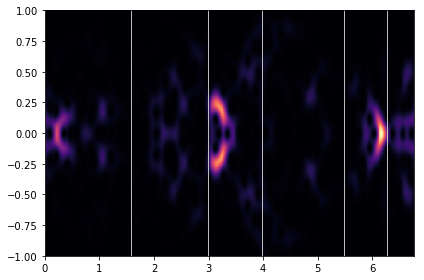

In [30]:
%%timeit
pf.plot_Husimi_function(weirdBilliard, 200.38821077, delta= 5)